In [7]:
!pip install tensorflow matplotlib seaborn
#necessary

#!python --version
#import tensorflow as tf
#print("TensorFlow version:", tf.__version__)

In [8]:
# a. Import required packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# b. Load the training and testing data
# =====================================

# Load your CSV files (update file paths)
train_df = pd.read_csv("C:\\Users\\\\OneDrive\\Desktop\\DL\\DLDataset\\MNISTAssn2&3\\mnist_train.csv")
test_df  = pd.read_csv("C:\\Users\\\\OneDrive\\Desktop\\DL\\DLDataset\\MNISTAssn2&3\\mnist_test.csv")

print(train_df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


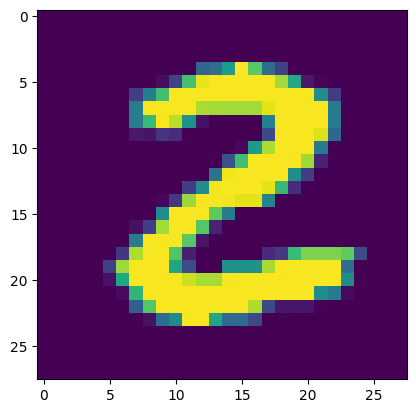

2


In [9]:
# Split into features (pixels) and labels
y_train = train_df['label'].values
x_train = train_df.drop('label', axis=1).values

y_test = test_df['label'].values
x_test = test_df.drop('label', axis=1).values

# Reshape to 28x28 images
x_train = x_train.reshape(-1, 28, 28)
x_test  = x_test.reshape(-1, 28, 28)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Print dataset details
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

#displaying the image
plt.imshow(x_train[25])
plt.show()
#printing corresponding label
print(y_train[25])

In [10]:
# =====================================
# c. Define the network architecture
# =====================================
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# =====================================
# d. Compile the model (SGD optimizer)
# =====================================
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


C:\ProgramData\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
844/844 - 6s - 8ms/step - accuracy: 0.7734 - loss: 0.8916 - val_accuracy: 0.9080 - val_loss: 0.3688
Epoch 2/11
844/844 - 5s - 6ms/step - accuracy: 0.8931 - loss: 0.3839 - val_accuracy: 0.9230 - val_loss: 0.2810
Epoch 3/11
844/844 - 5s - 6ms/step - accuracy: 0.9089 - loss: 0.3217 - val_accuracy: 0.9307 - val_loss: 0.2424
Epoch 4/11
844/844 - 5s - 6ms/step - accuracy: 0.9180 - loss: 0.2877 - val_accuracy: 0.9370 - val_loss: 0.2222
Epoch 5/11
844/844 - 5s - 6ms/step - accuracy: 0.9251 - loss: 0.2637 - val_accuracy: 0.9435 - val_loss: 0.2046
Epoch 6/11
844/844 - 5s - 6ms/step - accuracy: 0.9307 - loss: 0.2437 - val_accuracy: 0.9480 - val_loss: 0.1902
Epoch 7/11
844/844 - 5s - 6ms/step - accuracy: 0.9353 - loss: 0.2268 - val_accuracy: 0.9512 - val_loss: 0.1789
Epoch 8/11
844/844 - 5s - 6ms/step - accuracy: 0.9396 - loss: 0.2126 - val_accuracy: 0.9552 - val_loss: 0.1685
Epoch 9/11
844/844 - 5s - 6ms/step - accuracy: 0.9431 - loss: 0.1997 - val_accuracy: 0.9568 - val_loss: 0.1592
E

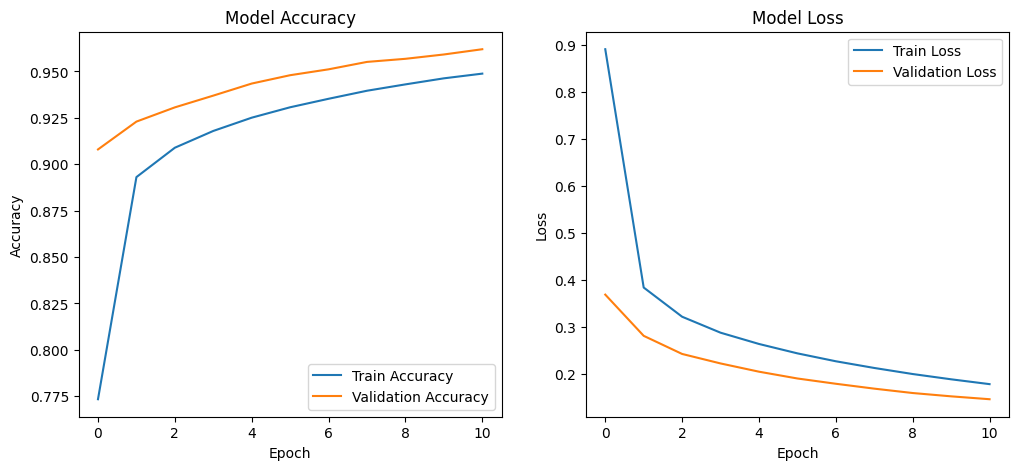

<Axes: >

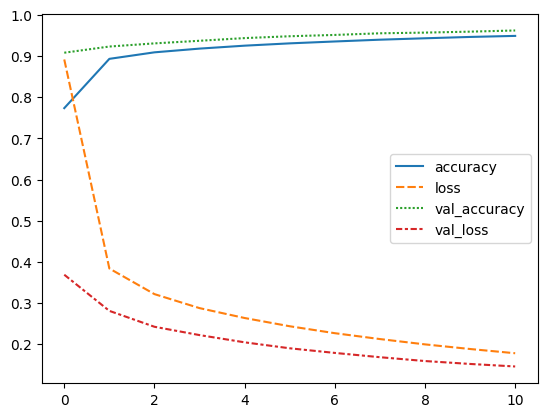

In [11]:
# =====================================
# e. Train the model
# =====================================
history = model.fit(
    x_train, y_train,
    epochs=11,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# =====================================
# f. Evaluate the network
# =====================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"\nTest Loss: {test_loss:.4f}")


# =====================================
# g. Plot the training loss and accuracy
# =====================================
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Seaborn plot (optional)
sns.lineplot(data=history.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


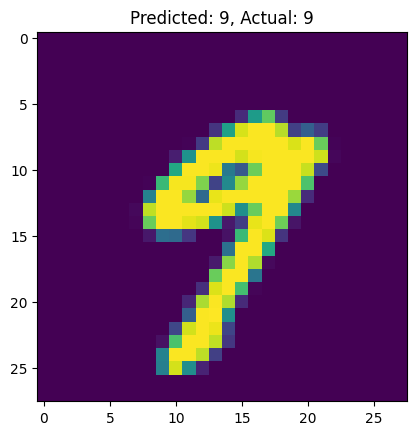

In [12]:
# =====================================
# f. Display Prediction Example
# =====================================

predictions = model.predict(x_test)
index = 20

plt.imshow(x_test[index])
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()